In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
 
file_link = "/content/drive/MyDrive/Colab Notebooks/creditcard.csv"
input_data = pd.read_csv(file_link, sep=",")
print(input_data.head())

   Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]


In [4]:
y = input_data['Class']
X = input_data.drop('Class', axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

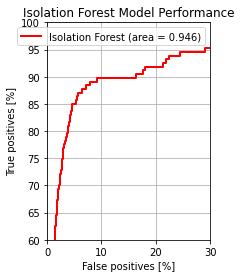

In [6]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

#create iforest model
iforest = IsolationForest()
#fit to data
iforest.fit(X_train)
#generate class probabilities
y_pred_iforest = - iforest.decision_function(X_val)

# print(y_pred_iforest)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_val, y_pred_iforest)
auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(100*fpr_rf, 100*tpr_rf, label= 'Isolation Forest (area = {:.3f})'.format(auc_rf), linewidth=2, color = 'red')
plt.xlabel('False positives [%]')
plt.ylabel('True positives [%]')
plt.xlim([0,30])
plt.ylim([60,100])
plt.grid(True)
ax = plt.gca()
ax.set_aspect('equal')
plt.title('Isolation Forest Model Performance')
plt.legend(loc='best')
plt.show()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
